### sources:
https://github.com/Blaizzy/mlx-vlm?tab=readme-ov-file#supported-models <br>
https://huggingface.co/mlx-community <br>
https://github.com/ml-explore/mlx-lm <br>

In [16]:
import mlx.core as mx
from mlx_vlm import load, generate
from mlx_vlm.prompt_utils import apply_chat_template
from mlx_vlm.utils import load_config
from PIL import Image as Im
from IPython import display
from IPython.display import display
from tqdm import tqdm
from dotenv import load_dotenv
import os
import regex as re

In [8]:
# Load environment variables from .env file
load_dotenv()

# Database connection details
cache_dir = os.getenv("CACHE_DIR")
working_dir = os.getcwd()
full_path = os.path.realpath(cache_dir)
image_cache_list = os.listdir(cache_dir)
image_list = []
for pic in image_cache_list:
    pic_path = os.path.join(cache_dir, pic)
    image_list.append(pic_path)

#image_list

In [9]:
# Load the model
model_path = "mlx-community/pixtral-12b-bf16"
model, processor = load(model_path)
config = load_config(model_path)



Fetching 13 files: 100%|██████████| 13/13 [00:00<00:00, 250119.05it/s]


In [ ]:
# Prepare input
image = ["http://images.cocodataset.org/val2017/000000039769.jpg"]
# image = [Image.open("...")] can also be used with PIL.Image.Image objects
prompt = "Describe this image."

# Apply chat template
formatted_prompt = apply_chat_template(
    processor, config, prompt, num_images=len(image)
)

# Generate output
output = generate(model, processor, formatted_prompt, image, verbose=False)
print(output)

GenerationResult(text='In the image, there are two cats resting on a pink sofa. One cat is positioned towards the left side, stretching out with its body relaxed and one paw extended upwards. The other cat is on the right side, lying down with its head resting on the sofa. There are two remote controls in the scene. One remote control is placed towards the top left corner, while the other is situated more towards the center-right of the image.', token=2, logprobs=array([-24.0767, -24.0761, -0.314028, ..., -23.742, -19.5695, -23.5651], dtype=float32), prompt_tokens=1238, generation_tokens=89, total_tokens=1327, prompt_tps=195.60670707672338, generation_tps=2.0469170247754778, peak_memory=30.760496864)


['The image presents a striking contrast of colors and shapes. Dominating the center of the image is a large, irregularly shaped orange blob. This blob, with its rough texture, appears to be the main focus of the image. \\n\\nScattered around the orange blob are several small white circles. These circles vary in size and shape, adding a sense of randomness to the composition. \\n\\nThe background of the image is black, which further accentuates the orange blob and the white circles. The overall effect is a sense of depth and dimension, with the orange blob and white circles appearing to float against the black background. \\n\\nThere is no text or discernible action in the image. The relative positions of the objects remain constant, with the orange blob centrally located and the white circles scattered around it. The image does not contain any other objects or elements. \\n\\nThis description is based on the visible content of the image and does not include any speculative or imaginar

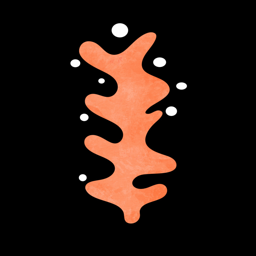

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
['The image you\\\'ve shared is a captivating piece of abstract art. It\\\'s a digital illustration that exudes a warm and inviting atmosphere. The color palette is dominated by shades of orange, yellow, and beige, creating a harmonious blend that is pleasing to the eye. The art style leans towards minimalism, with a focus on shapes and forms rather than detailed imagery. The overall effect is a sense of balance and tranquility. As for the landmark information "sa_17448", I\\\'m afraid I couldn\\\'t find any relevant information about it. It might be helpful to provide more context or details.']


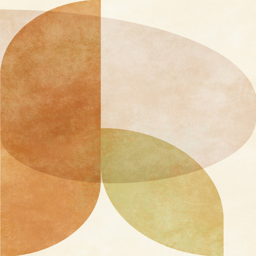

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
['The image presents an abstract piece of art that is dominated by a vibrant shade of orange. The central focus of the image is a large, irregularly shaped orange form, which appears to be composed of numerous smaller, overlapping shapes. These smaller shapes are arranged in a way that gives the impression of a tree or a plant, with the larger form serving as the trunk and the smaller shapes representing the branches and leaves.\\n\\nScattered throughout the image are several black dots, adding a contrasting element to the overall composition. These dots are not evenly distributed, but rather they are concentrated in certain areas, creating a sense of balance within the image.\\n\\nThe background of the image is a light pink color, which provides a soft backdrop that allows the orange form and black dots to stand out. The image does not 

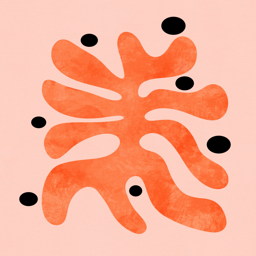

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
['The image you\\\'ve shared is a captivating piece of abstract art. It features a harmonious blend of warm colors, predominantly orange, pink, and green. The art style leans towards minimalism, with a focus on shapes and forms rather than detailed representation. The composition is balanced, with the shapes and colors complementing each other to create a sense of unity and harmony. The overall effect is a visually pleasing piece that invites viewers to interpret its meaning in their own unique ways. As for the landmark information "sa_17448", I\\\'m afraid I couldn\\\'t find any relevant information about it. It might be helpful to provide more context or details.']


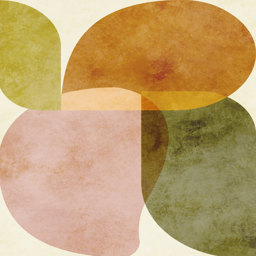

 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 


In [ ]:
regex_pattern = r"(?:text=')(.*)(?=\',)"
for pic_url in image_list:
    image = Im.open(pic_url)
    image_smol = image.resize((256, 256))
    PROMPT = "Describe the image."
    formatted_prompt = apply_chat_template(processor, config, PROMPT, num_images=1)
    output = generate(model, processor, formatted_prompt, image, verbose=False)
    relevant_output = re.findall(regex_pattern, str(output))
    print(relevant_output)
    display(image_smol)
    print( ' - ' * 50)